In [30]:
import obspy
from obspy import read, read_inventory
from obspy.io.sac.sactrace import SACTrace
from obspy.io.sac.util import get_sac_reftime
import os
import glob
import numpy
from shutil import move

In [31]:
data_sac = '/home/ketan/IndiaConnectNTU/Week5-6/DownloadData/Data/Download3/SAC_all1'

In [32]:
### Rotate from ENZ to RTZ coordnate

if not os.path.exists(data_sac):
    print("Missing File: %s" % data_sac)
    os.sys.exit()

for ev in sorted(os.listdir(data_sac)):
#for ev in sorted(glob.glob(f"{data_sac}/NC.NSM")):
    print(ev)
    inpath = os.path.join(data_sac, ev)
    
    funiq = []
    for sac in glob.glob(f"{inpath}/*[NEZ].SAC.bp.cut"):
        st = obspy.read(sac)
        funiq.append("{}.{}.{}".format(st[0].stats.network,st[0].stats.station,st[0].stats.location))
    fU = sorted(set(funiq))

    for sacfile in fU:
        try:
            st = obspy.read(f"{inpath}/{sacfile}*[NEZ].SAC.bp.cut")
           # print(st)

            baz = st[0].stats.sac["baz"]
            st_rotate = st.rotate('NE->RT', back_azimuth=baz)
            ## print(st_rotate)

            sacf0 = "{}.{}.SAC.bp.cut".format(sacfile,st_rotate[0].stats.channel)
            sacf1 = "{}.{}.SAC.bp.cut".format(sacfile,st_rotate[1].stats.channel)
            sacf2 = "{}.{}.SAC.bp.cut".format(sacfile,st_rotate[2].stats.channel)
            st_rotate[0].write(f"{inpath}/{sacf0}", format="SAC")
            st_rotate[1].write(f"{inpath}/{sacf1}", format="SAC")
            st_rotate[2].write(f"{inpath}/{sacf2}", format="SAC")
        except:
            for ch in ['BHN', 'BHE', 'BHZ']:
                try:
                    os.remove(f"{inpath}/{sacfile}."+ch+".SAC")
                    os.remove(f"{inpath}/{sacfile}."+ch+".SAC.bp")
                    os.remove(f"{inpath}/{sacfile}."+ch+".SAC.bp.cut")
                except:
                    pass

20211016201446472
20211019000331986
20211101134345622
20211108061627185
20211231135935809


In [37]:
### Rotate from ENZ to RTZ coordnate

if not os.path.exists(data_sac):
    print("Missing File: %s" % data_sac)
    os.sys.exit()

for ev in sorted(os.listdir(data_sac)):
#for ev in sorted(glob.glob(f"{data_sac}/NC.NSM")):
    print(ev)
    inpath = os.path.join(data_sac, ev)
    
    funiq = []
    for sac in glob.glob(f"{inpath}/*[NEZ].SAC.bp"):
        st = obspy.read(sac)
        funiq.append("{}.{}.{}".format(st[0].stats.network,st[0].stats.station,st[0].stats.location))
    fU = sorted(set(funiq))

    for sacfile in fU:
        try:
            st = obspy.read(f"{inpath}/{sacfile}*[NEZ].SAC.bp")
           # print(st)

            baz = st[0].stats.sac["baz"]
            st_rotate = st.rotate('NE->RT', back_azimuth=baz)
            ## print(st_rotate)

            sacf0 = "{}.{}.SAC.bp".format(sacfile,st_rotate[0].stats.channel)
            sacf1 = "{}.{}.SAC.bp".format(sacfile,st_rotate[1].stats.channel)
            sacf2 = "{}.{}.SAC.bp".format(sacfile,st_rotate[2].stats.channel)
            st_rotate[0].write(f"{inpath}/{sacf0}", format="SAC")
            st_rotate[1].write(f"{inpath}/{sacf1}", format="SAC")
            st_rotate[2].write(f"{inpath}/{sacf2}", format="SAC")
        except:
            for ch in ['BHN', 'BHE', 'BHZ']:
                try:
                    os.remove(f"{inpath}/{sacfile}."+ch+".SAC")
                    os.remove(f"{inpath}/{sacfile}."+ch+".SAC.bp")
                    os.remove(f"{inpath}/{sacfile}."+ch+".SAC.bp.cut")
                except:
                    pass

20211016201446472
20211019000331986
20211101134345622
20211108061627185
20211231135935809


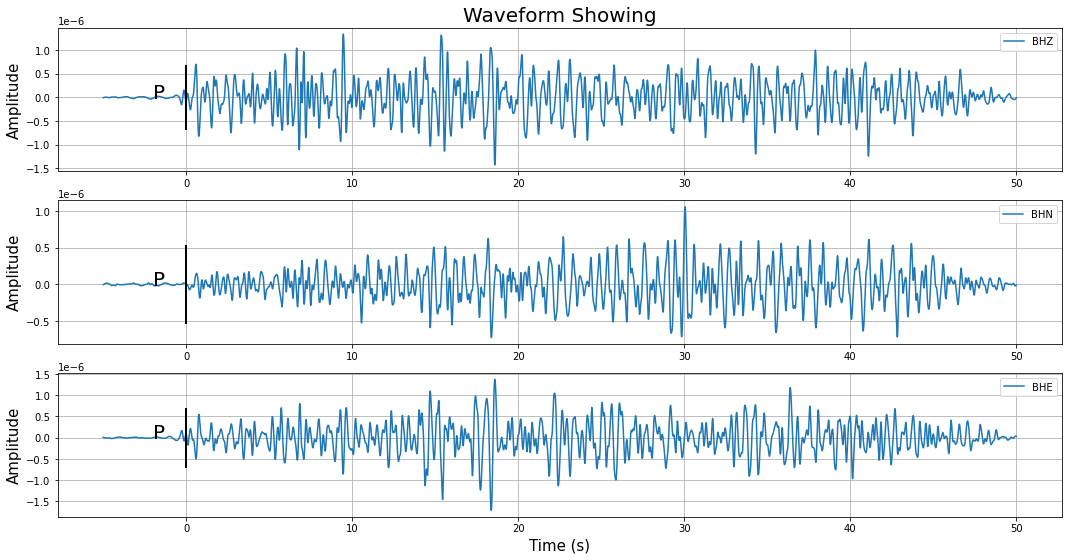

In [1]:
# Quick waveform check
from obspy import read
from obspy.io.sac import SACTrace 
import matplotlib.pyplot as plt
import numpy as np

wtdir='/home/ketan/IndiaConnectNTU/Week5-6/DownloadData/Data/Download3/SAC_all1'
evt = "20211231135935809"
stati = 'C1.MT02'

st = read(f"{wtdir}/{evt}/{stati}..BHZ.SAC.bp.cut")
st1 = read(f"{wtdir}/{evt}/{stati}..BHN.SAC.bp.cut")
st2 = read(f"{wtdir}/{evt}/{stati}..BHE.SAC.bp.cut")

t = np.arange(st[0].stats.sac.b, st[0].stats.npts / st[0].stats.sampling_rate + st[0].stats.sac.b, st[0].stats.delta)

plt.figure(figsize=(18,9))
plt.subplot(311)
plt.plot(t,st[0].data,label="BHZ")
#first-P arrival
plt.plot([st[0].stats.sac.t1, st[0].stats.sac.t1], [-1*max(st[0].data)*0.5, max(st[0].data)*0.5], color="black", linewidth=2)
plt.text(st[0].stats.sac.t1-2, -1*max(st[0].data)*0.01, 'P', fontsize=20)
plt.legend()
plt.ylabel("Amplitude",fontsize=15)
plt.title('Waveform Showing', fontsize=20)
plt.grid()

plt.subplot(312)
plt.plot(t,st1[0].data,label="BHN")
plt.plot([st[0].stats.sac.t1, st[0].stats.sac.t1], [-1*max(st1[0].data)*0.5, max(st1[0].data)*0.5], color="black", linewidth=2)
plt.text(st[0].stats.sac.t1-2, -1*max(st1[0].data)*0.01, 'P', fontsize=20)
plt.legend()
plt.ylabel("Amplitude",fontsize=15)
plt.grid()

plt.subplot(313)
plt.plot(t,st2[0].data,label="BHE")
plt.plot([st[0].stats.sac.t1, st[0].stats.sac.t1], [-1*max(st2[0].data)*0.5, max(st2[0].data)*0.5], color="black", linewidth=2)
plt.text(st[0].stats.sac.t1-2, -1*max(st2[0].data)*0.01, 'P', fontsize=20)
plt.legend()
plt.ylabel("Amplitude",fontsize=15)
plt.xlabel("Time (s)",fontsize=15)
plt.grid()

plt.show()

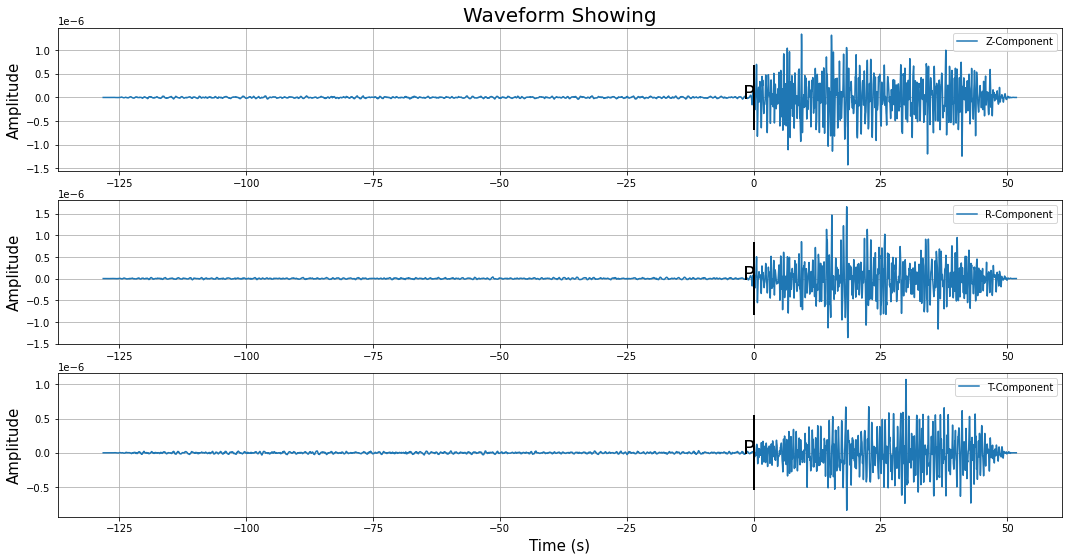

In [22]:
# Quick waveform check
from obspy import read
from obspy.io.sac import SACTrace 
import matplotlib.pyplot as plt
import numpy as np

wtdir='/home/ketan/IndiaConnectNTU/Week5-6/DownloadData/Data/Download3/SAC_all1'
evt = "20211231135935809"
stati = 'C1.MT02'
st = read(f"{wtdir}/{evt}/{stati}..BHZ.SAC.bp")
st1 = read(f"{wtdir}/{evt}/{stati}..BHR.SAC.bp")
st2 = read(f"{wtdir}/{evt}/{stati}..BHT.SAC.bp")

t = np.arange(st[0].stats.sac.b, st[0].stats.npts / st[0].stats.sampling_rate + st[0].stats.sac.b, st[0].stats.delta)

plt.figure(figsize=(18,9))
plt.subplot(311)
plt.plot(t,st[0].data,label="Z-Component")
#first-P arrival
plt.plot([st[0].stats.sac.t1, st[0].stats.sac.t1], [-1*max(st[0].data)*0.5, max(st[0].data)*0.5], color="black", linewidth=2)
plt.text(st[0].stats.sac.t1-2, -1*max(st[0].data)*0.01, 'P', fontsize=20)
plt.legend()
plt.ylabel("Amplitude",fontsize=15)
plt.title('Waveform Showing', fontsize=20)
plt.grid()

plt.subplot(312)
plt.plot(t,st1[0].data,label="R-Component")
plt.plot([st[0].stats.sac.t1, st[0].stats.sac.t1], [-1*max(st1[0].data)*0.5, max(st1[0].data)*0.5], color="black", linewidth=2)
plt.text(st[0].stats.sac.t1-2, -1*max(st1[0].data)*0.01, 'P', fontsize=20)
plt.legend()
plt.ylabel("Amplitude",fontsize=15)
plt.grid()

plt.subplot(313)
plt.plot(t,st2[0].data,label="T-Component")
plt.plot([st[0].stats.sac.t1, st[0].stats.sac.t1], [-1*max(st2[0].data)*0.5, max(st2[0].data)*0.5], color="black", linewidth=2)
plt.text(st[0].stats.sac.t1-2, -1*max(st2[0].data)*0.01, 'P', fontsize=20)
plt.legend()
plt.ylabel("Amplitude",fontsize=15)
plt.xlabel("Time (s)",fontsize=15)
plt.grid()

plt.show()